# Goal-Based Repository Analysis

This notebook analyzes the classified repository data from `classified_gov_repositories_goal_based.csv` to identify which repositories are most relevant to a set of predefined strategic goals. 

We will explore:
1.  The overall distribution of scores for each goal.
2.  The top-scoring repositories for each individual goal.
3.  High-impact repositories that score well across multiple goals.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better viewing of text columns
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_colwidth', 1000)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Load and Prepare Data

First, we load the dataset and prepare it for analysis. This involves identifying the score and reason columns and ensuring the scores are in a numeric format.

In [7]:
file_path = '/home/theo/projects/iai/data/tmprunid/classified_gov_repositories_goal_based.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    # Create an empty dataframe to avoid further errors in the notebook
    df = pd.DataFrame()

# Identify goal-related columns
goal_prefixes = [
    'economic_growth_and_stability',
    'healthcare_modernisation',
    'national_security_and_border_control',
    'energy_security_and_net_zero',
    'education_and_skills'
]

score_cols = [f"{prefix}_score" for prefix in goal_prefixes]
reason_cols = [f"{prefix}_reason" for prefix in goal_prefixes]

# Convert score columns to numeric, coercing errors to NaN
for col in score_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data loaded and prepared. Displaying first 5 rows:")
df.head()

Data loaded and prepared. Displaying first 5 rows:


,account,name,description,stars,forks,language,url,readme,last_scanned_utc,created_at,...,economic_growth_and_stability_score,economic_growth_and_stability_reason,healthcare_modernisation_score,healthcare_modernisation_reason,national_security_and_border_control_score,national_security_and_border_control_reason,energy_security_and_net_zero_score,energy_security_and_net_zero_reason,education_and_skills_score,education_and_skills_reason
0,uswds,uswds,"The U.S. Web Design System helps the federal government build fast, accessible, mobile-friendly websites.",6954,1040,SCSS,https://github.com/uswds/uswds,# United States Web Design System\n\n[![CircleCI Build Status](https://img.shields.io/circleci/build/gh/uswds/uswds/develop?style=for-the-badge&logo=circleci)](https://circleci.com/gh/uswds/uswds/tree/develop) ![Snyk vulnerabilities](https://img.shields.io/snyk/vulnerabilities/npm/@uswds/uswds?style=for-the-badge) [![npm Version](https://img.shields.io/npm/v/@uswds/uswds?style=for-the-badge)](https://www.npmjs.com/package/uswds) [![npm Downloads](https://img.shields.io/npm/dt/@uswds/uswds?style=for-the-badge)](https://www.npmjs.com/package/uswds) [![GitHub issues](https://img.shields.io/github/issues/uswds/uswds?style=for-the-badge&logo=github)](https://github.com/uswds/uswds/issues) [![code style: prettier](https://img.shields.io/badge/code_style-prettier-ff69b4?style=for-the-badge)](https://github.com/prettier/prettier)\n\nThe [United States Web Design System](https://designsystem.digital.gov) includes a library of open source UI components and a visual style guide for U.S. feder...,2025-06-24T21:37:57.370169Z,2015-05-20T19:10:10Z,...,3,"Improving the efficiency of government websites through standardization can lead to cost savings and improved public service delivery, indirectly contributing to economic stability. However, the USWDS is US-centric and its direct impact on the UK economy is limited.",1,The USWDS is a general-purpose web design system; it doesn't offer specific tools or functionalities relevant to healthcare. Its application to healthcare websites would be indirect and require significant adaptation.,0,"The USWDS is purely focused on website design and has no relevance to national security, border control, law enforcement technology, or defense systems.",0,"The USWDS is a web design system and is not related to renewable energy technologies, grid management, or climate data analysis.",1,"While the USWDS could be used to build educational websites, its contribution is indirect and limited. It's a general-purpose tool, not specifically designed for educational technology or skills development."
1,uswds,public-sans,"A strong, neutral, principles-driven, open source typeface for text or display",4548,116,HTML,https://github.com/uswds/public-sans,"# Public Sans\n\nCurrent font files for the Public Sans typeface.\nThis typeface is based off of https://github.com/impallari/Libre-Franklin. Public Sans is a Latin-only font.\n\n## Usage\n\n- **Webfonts** are available in `fonts/webfonts`\n- **Opentype** fonts for installing locally and for print applications are available in `fonts/otf`\n- **Variable fonts** should be considered experimental, but can be found in `fonts/variable`\n- **Source files** are available in `sources` as both [Glyphs](https://glyphsapp.com/) files and as UFO + Designspace.\n\n## Design principles\n\n- Be available as a free, open source webfont on any platform.\n- Use metrics similar to common system fonts for smoother progressive enhancement.\n- Have a broad range of weights and a good italic.\n- Perform well in headlines, text, and UI.\n- Be straightforward: have as few quirks as possible.\n- Have good multilingual support.\n- Allow for good data design with tabular figures.\n- Be strong and neutral.\n- ...",2025-06-24T21:37:56.807430Z,2016-11-04T13:51:35Z,...,2,"While not directly impacting financial analysis or business support, a freely available, high-quality font could indirectly improve the e

## 2. Overall Score Distribution

Let's visualize the distribution of scores for each goal to get a general sense of how repositories were rated.

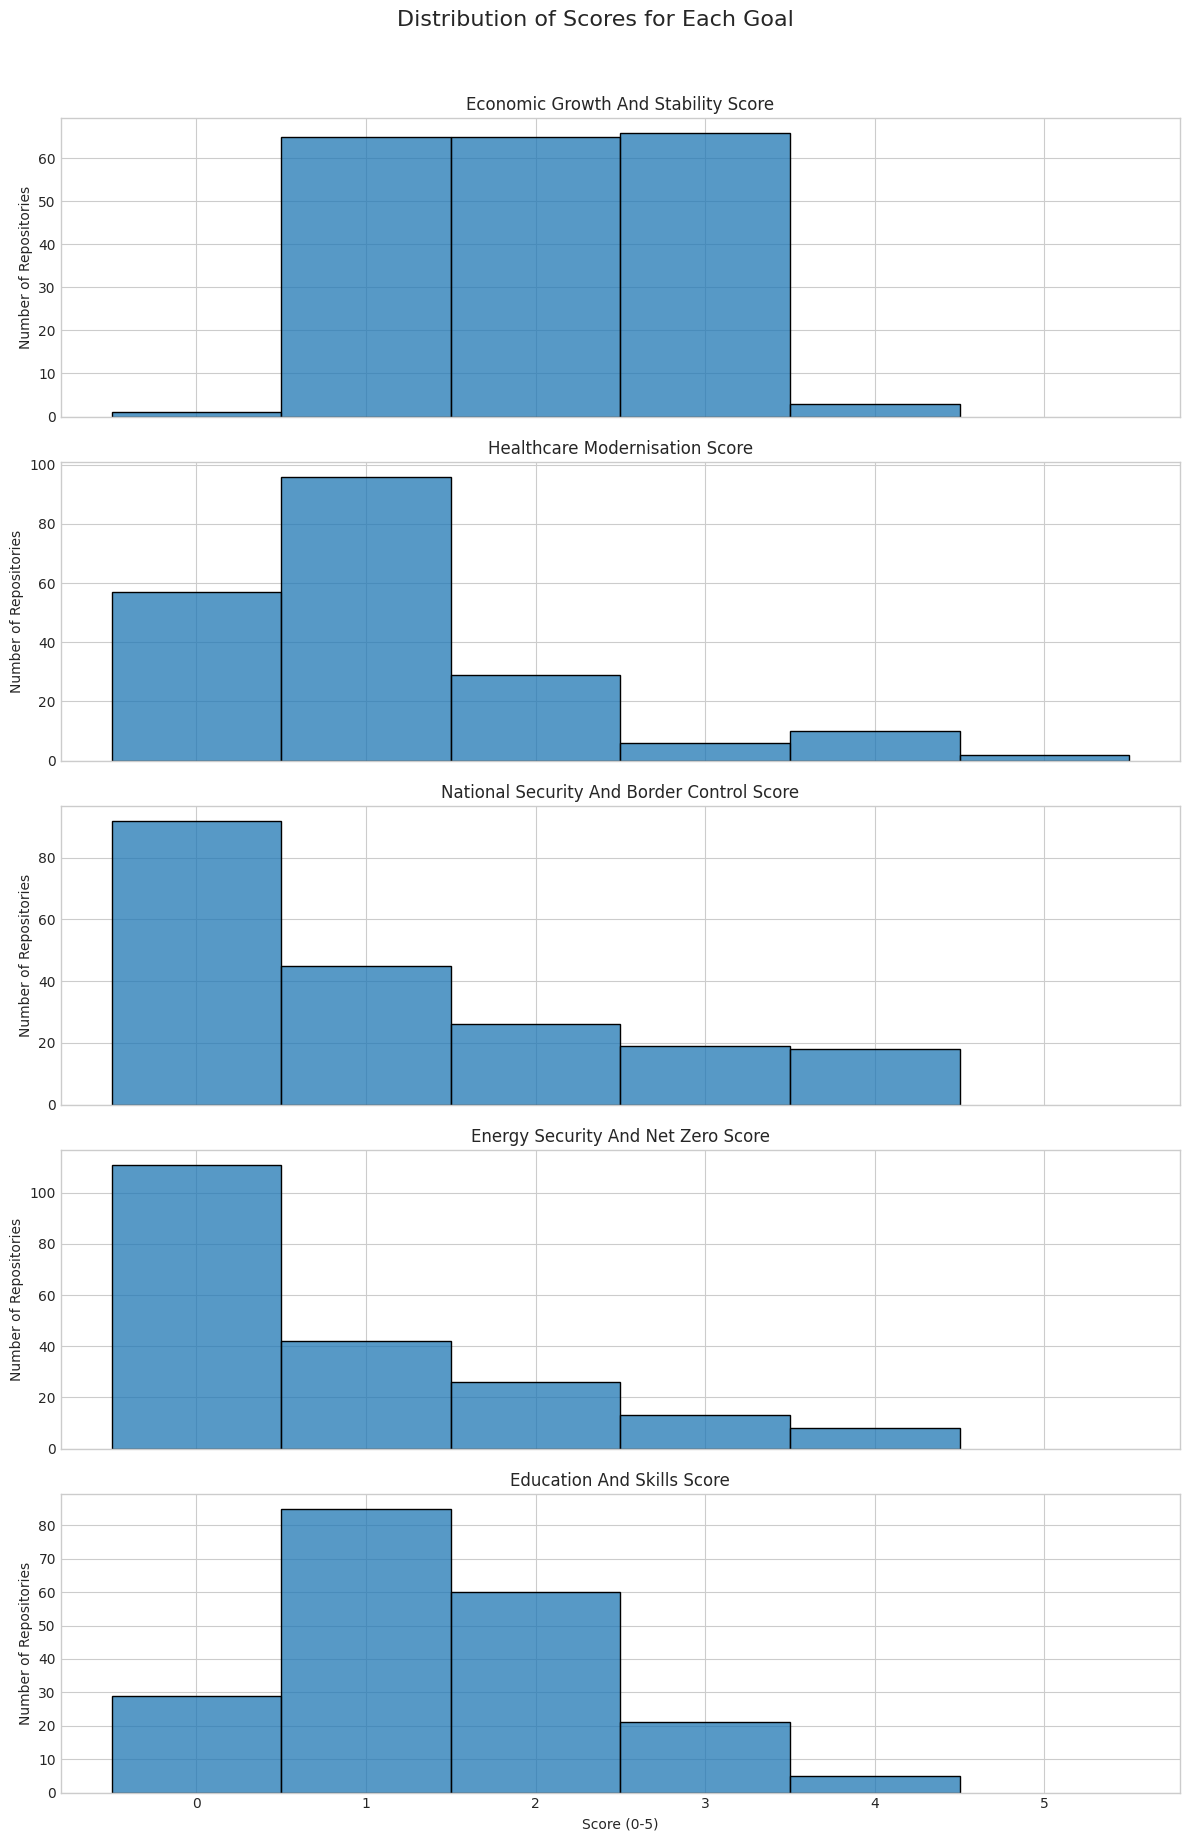

In [3]:
if not df.empty:
    fig, axes = plt.subplots(len(score_cols), 1, figsize=(12, 18), sharex=True)
    fig.suptitle('Distribution of Scores for Each Goal', fontsize=16, y=1.02)

    for i, col in enumerate(score_cols):
        if col in df.columns:
            sns.histplot(df[col].dropna(), ax=axes[i], bins=np.arange(0, 6.5, 1), kde=False, discrete=True)
            axes[i].set_title(col.replace('_', ' ').title())
            axes[i].set_xlabel('Score (0-5)')
            axes[i].set_ylabel('Number of Repositories')
            axes[i].set_xticks(np.arange(0, 6, 1))
        else:
            axes[i].set_title(f'{col} not found')
            axes[i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()
else:
    print("DataFrame is empty, skipping visualization.")

## 3. Top Repositories Per Goal

Now, let's identify the top-scoring repositories for each individual goal. We'll display the repository name, its score, and the reason provided by the LLM for that score.

In [8]:
if not df.empty:
    for prefix in goal_prefixes:
        score_col = f'{prefix}_score'
        reason_col = f'{prefix}_reason'
        
        if score_col in df.columns and reason_col in df.columns:
            # Filter for repositories with a score > 0 to find relevant ones
            relevant_repos = df[df[score_col] > 0].copy()
            
            if not relevant_repos.empty:
                top_repos = relevant_repos.sort_values(by=score_col, ascending=False).head(5)
                
                print("-" * 80)
                print(f"🏆 Top Repositories for: {prefix.replace('_', ' ').title()}")
                print("-" * 80)
                
                # Use display() for better formatting in Jupyter
                display(top_repos[['name', 'summary', score_col, reason_col]].reset_index(drop=True))
                print("\n" * 2)
            else:
                print(f"\nNo repositories found with a score > 0 for {prefix.replace('_', ' ').title()}\n")
else:
    print("DataFrame is empty, skipping analysis.")

--------------------------------------------------------------------------------
🏆 Top Repositories for: Economic Growth And Stability
--------------------------------------------------------------------------------


,name,summary,economic_growth_and_stability_score,economic_growth_and_stability_reason
0,coeci-cms-mpsp,"This repository contains a provider screening application developed to streamline Medicaid provider enrollment. It facilitates identity verification, linking individuals to organizations, and applying graded screening methodologies based on risk. The application builds provider profiles, storing screening results for comparison against future screenings and flagging potentially fraudulent providers. This aims to reduce administrative burdens and combat fraud and abuse within Medicaid programs.",4,"By reducing administrative burdens and combating fraud in Medicaid, this application contributes to greater efficiency in public spending and potentially reduces the national debt. This aligns with economic growth and stability goals."
1,design-system,The PDIS Design System provides scalable design components and development guidelines for creating user-friendly government websites. It defines minimum viable solutions and uses visual examples. The system aims to improve efficiency for teams building government websites. It offers tools to streamline the design and development process.,4,"By improving the efficiency of government website development, this design system reduces costs and development time, contributing to public sector efficiency and potentially freeing up resources for other economic initiatives."
2,BEAR-toolbox,"The BEAR toolbox is a MATLAB-based software package for Bayesian VAR modeling, forecasting, and policy analysis. It offers a user-friendly interface, enabling both technical and non-technical users to perform advanced analyses. BEAR includes features such as FAVARs, stochastic volatility, and various Bayesian Panel VAR options. It's designed for transparent, state-of-the-art economic research and is continuously updated.",4,"The BEAR toolbox directly supports financial analysis and forecasting, crucial for economic policymaking. Its use in policy analysis can contribute to better decision-making for economic growth and stability. The user-friendly interface broadens accessibility."
3,uswds,"The United States Web Design System (USWDS) provides a library of open-source UI components and a visual style guide to help federal government agencies build fast, accessible, and mobile-friendly websites. It offers CSS and JavaScript components for easy integration into projects. The system includes comprehensive documentation and a style guide available online. USWDS aims to standardize web design across government websites.",3,"Improving the efficiency of government websites through standardization can lead to cost savings and improved public service delivery, indirectly contributing to economic stability. However, the USWDS is US-centric and its direct impact on the UK economy is limited."
4,islandora_multi_importer,"This Islandora module facilitates flexible, user-friendly import and update of tabular data into Islandora objects using Twig templates. It streamlines metadata cleanup and allows simultaneous ingestion of diverse content types, including complex hierarchies. The module offers selective derivative creation and avoids rigid naming conventions. It integrates with various storage options and supports regular expressions within Twig templates.",3,"Improved data management within the public sector can lead to increased efficiency and cost savings. This module could contribute to this by streamlining workflows and reducing manual data entry, though its direct impact on economic indicators is indirect."





--------------------------------------------------------------------------------
🏆 Top Repositories for: Healthcare Modernisation
--------------------------------------------------------------------------------


,name,summary,healthcare_modernisation_score,healthcare_modernisation_reason
0,coeci-cms-mpsp,"This repository contains a provider screening application developed to streamline Medicaid provider enrollment. It facilitates identity verification, linking individuals to organizations, and applying graded screening methodologies based on risk. The application builds provider profiles, storing screening results for comparison against future screenings and flagging potentially fraudulent providers. This aims to reduce administrative burdens and combat fraud and abuse within Medicaid programs.",5,"The application directly supports healthcare modernization by streamlining Medicaid provider enrollment, improving efficiency, and reducing fraud. This leads to better resource allocation within the healthcare system."
1,smart-anc,"This repository provides a FHIR Implementation Guide for the WHO's antenatal care guidelines. It aims to support digital implementation of WHO recommendations for positive pregnancy experiences. The guide includes a complete pathway, routine contact details, and decision support indicators. It's actively developed and accepts feedback for future releases. The guide is built using the FHIR Implementation Guide publisher and is available online.",5,"This FHIR Implementation Guide directly supports NHS modernization by providing digital tools to improve antenatal care. It streamlines processes and improves data management, leading to better patient outcomes."
2,ddcc-trust,"This repository, the DDCC Global Trust Registry, provides a central location for trusted issuers of COVID-19 credentials across various standards. It contains cryptographic keys and sample QR codes from participating members. The repository enables verification of digital COVID certificates. Members can contribute and update their keys and QR codes via pull requests.",4,"The repository directly supports healthcare modernization by facilitating the verification of COVID-19 credentials, streamlining processes, and potentially improving patient care through efficient data management. This is highly relevant to NHS digital initiatives."
3,smart-core,"This repository provides a core set of data element profiles for use in World Health Organization (WHO) computable guideline content. These shared data elements are used across various WHO implementation guides, ensuring consistency. The repository uses the FHIR Implementation Guide publisher to automatically generate and publish the guide. It also allows for local building of the guide.",4,"The repository directly supports healthcare modernization by providing standardized data elements for WHO guidelines, improving data interoperability and potentially streamlining healthcare processes. This could benefit the NHS through improved data exchange and potentially better integration of systems."
4,ddcc,This repository provides an implementation guide for the WHO Digital Documentation of COVID-19 Certificates: Vaccination Status (DDCC:VS). It enables the digital documentation of COVID-19 vaccination status. The guide is published online and managed via GitHub issues and a Kanban board. The repository facilitates the development and implementation of standardized digital COVID-19 vaccination certificates.,4,This repository directly supports healthcare modernization by providing a standardized approach to digital vaccination certificates. This improves data management and potentially streamlines healthcare processes.





--------------------------------------------------------------------------------
🏆 Top Repositories for: National Security And Border Control
--------------------------------------------------------------------------------


,name,summary,national_security_and_border_control_score,national_security_and_border_control_reason
0,lexml-linker,"The LexML Linker is a parser for legislative references. It processes input text to identify and link legislative references, generating output in various formats (text, HTML, XML). The tool offers command-line options for specifying input sources, output formats, and context. It provides debugging and logging features for enhanced usability.",4,"The LexML Linker's ability to process and analyze legislative references is highly relevant to law enforcement and national security. It could assist in investigations and legal processes, potentially improving efficiency and accuracy."
1,re3d,"This repository provides a gold-standard dataset for training and validating machine learning models for natural language processing, specifically entity and relationship extraction. The dataset focuses on the defense and security intelligence analysis domain, using documents related to the conflict in Syria and Iraq. It consists of multiple smaller datasets, each containing documents, entities, and relationships in JSON format. The data is designed to enable the development and evaluation of NLP models for this specialized domain.",4,"The dataset directly supports the development of NLP models for intelligence analysis, a key component of national security. Its focus on conflict zones makes it highly relevant to defense and potentially border security applications."
2,project-interoperability.github.io,"Project Interoperability aims to improve government information sharing by establishing baseline terms, tools, and techniques for connecting networks and systems. It seeks to normalize information sharing technology development across government and non-government organizations, promoting a connected government architecture. The project leverages existing enterprise architecture frameworks and service-oriented architecture principles to suggest standards and methodologies for linking systems. It facilitates collaboration through communities of interest and practice focused on mission-centric information sharing and functional capabilities.",4,Enhanced information sharing between government agencies and relevant organizations is crucial for national security. This project directly addresses this need by providing tools and standards for improved interoperability.
3,SAPIENT-Proto-Files,"This repository provides protobuf definitions for the interfaces specified in BSI Flex 335, which governs communication within a SAPIENT system. SAPIENT is a system of autonomous edge nodes with sensor or effector capabilities, a fusion node, and message handling applications. The standard promotes local autonomy, information transmission rather than raw data, information fusion, and autonomous task execution. This results in reduced operator workload, improved autonomy, lower bandwidth needs, and node modularity.",4,"The secure communication protocols and autonomous node capabilities described are highly relevant to various national security applications, such as autonomous surveillance systems or secure communication networks. The emphasis on information fusion also enhances situational awareness."
4,miasm,"Miasm is a reverse engineering framework enabling analysis, modification, and generation of binary programs. It supports multiple architectures (x86, ARM, MIPS, etc.) and provides features like assembling, disassembling, and emulation using JIT compilation. The framework uses an intermediate language to represent assembly semantics and offers expression simplification for de-obfuscation. Miasm facilitates dynamic code analysis and unpacking.",4,"Miasm is highly relevant to national security, particularly in cybersecurity. Its ability to analyze and understand malicious software is crucial for identifying and mitigating threats to national infrastructure and systems."





--------------------------------------------------------------------------------
🏆 Top Repositories for: Energy Security And Net Zero
--------------------------------------------------------------------------------


,name,summary,energy_security_and_net_zero_score,energy_security_and_net_zero_reason
0,CCDR-tools,This repository provides geospatial analysis tools for assessing climate change and disaster risk. It enables screening and evaluation of risks based on geographic data. The goal is to support decision-making related to climate and disaster preparedness. The repository offers functionalities for geoanalytics in this specific domain.,4,"The repository directly supports climate data analysis, crucial for informed decision-making in transitioning to Net Zero. Understanding climate risks is essential for planning and mitigating the impacts on energy infrastructure."
1,compliance-checker,The IOOS Compliance Checker is a Python tool that verifies the completeness and compliance of NetCDF datasets against CF and ACDD standards. It functions as a command-line tool and a library for integration into other software. A web-based version offers broader accessibility for checking datasets via link or upload. The checker supports various CF and ACDD versions.,4,"Highly relevant as accurate and compliant NetCDF datasets are crucial for climate modeling, renewable energy resource assessment, and environmental monitoring, all essential for Net Zero goals. The tool directly improves data quality for these applications."
2,hakunapi,"Hakunapi is a high-performance Java server implementing the OGC API Features standard, supporting core functionalities, coordinate reference systems, and CQL2 filtering. It offers a simple, deployable servlet module for quick setup with PostGIS databases. Furthermore, Hakunapi provides a modular framework for building customized OGC API Features servers. It prioritizes efficient data streaming to optimize performance.",4,"Hakunapi's high-performance geospatial data handling is highly relevant for managing and analyzing data related to renewable energy infrastructure, energy grids, and climate change monitoring. This makes it a valuable tool for supporting the transition to Net Zero."
3,Cloud-Sandbox,"The IOOS Coastal Modeling Cloud Sandbox facilitates the development, modification, and execution of regional coastal models within a cloud environment. It provides reusable configurations, model code, necessary libraries, input data, and output analysis tools. The Sandbox leverages cloud high-performance computing (HPC) for model development, validation, and execution, supporting diverse use cases including research and operational applications. It offers various deployment options, including self-hosting and hosted solutions.",4,"Coastal modeling is highly relevant to understanding sea-level rise and coastal erosion, both critical factors in climate change adaptation. The improved modeling capabilities could inform infrastructure planning and resource management related to renewable energy sources."
4,ioos_code_lab,"The IOOS CodeLab repository provides tutorials and examples demonstrating how to access and utilize IOOS technologies and data sources. It offers Python, Matlab, and R notebooks for scientists and environmental managers to perform data analysis and create visualizations. The repository enables users to build the JupyterBook locally for convenient access to these resources. The collection focuses on in-depth data exploration and original analysis.",4,"The repository provides tools for analyzing environmental data, which is highly relevant for climate change research and informing policies related to energy security and the transition to Net Zero. The data analysis capabilities are directly applicable."





--------------------------------------------------------------------------------
🏆 Top Repositories for: Education And Skills
--------------------------------------------------------------------------------


,name,summary,education_and_skills_score,education_and_skills_reason
0,co2sensoren,"This project provides schools with CO2 sensors, including a built-in alarm that triggers ventilation when CO2 levels are too high. It aims to improve indoor air quality and promote health, particularly in classrooms. Students can build and program the sensors themselves, fostering data literacy, programming skills, and an understanding of CO2 levels and their impact. The project uses a color-coded system (green, orange, red) to indicate CO2 levels.",4,"The project directly enhances education by teaching students programming, data literacy, and scientific concepts. It also provides a practical, hands-on learning experience."
1,BioData-Training-Workshop,"This repository provides R and Python resources for a biological data training workshop. It offers instructions and tools for setting up local and cloud-based (JupyterHub and RStudio) programming environments. Participants can utilize Jupyter notebooks covering Python, R, and mixed-language examples. The materials support the standardization of marine biological data.",4,The repository directly contributes to education and skills development by providing training resources and tools in data analysis using R and Python. These are valuable skills applicable across many sectors.
2,curso-taller-openerp,"This repository provides a course on Odoo v8.0 development. It offers lessons covering module structure, model creation, view design, data manipulation, and advanced concepts like relationships, workflows, and reporting. The course includes practical exercises and examples to guide learners through building Odoo applications. The lessons progressively build skills, from basic installation to creating complex features.",4,The course directly contributes to education and skills development by providing training in a widely used business software. This enhances the employability of graduates and could improve the UK's digital skills base.
3,nordic-epub3-dtbook-migrator,"This repository provides tools for converting between EPUB3 and DTBook, a strict subset of DTBook. It offers scripts for bidirectional conversion between these formats, including intermediary single-page HTML representations. Validators for EPUB3, DTBook, and HTML are also included. The goal is to enable seamless migration between legacy DTBook-based systems and newer EPUB3 workflows.",4,"This repository directly improves accessibility of digital educational materials. The conversion tools are highly relevant for creating accessible educational resources in EPUB3 format, benefiting learners with disabilities."
4,TorPylle,TorPylle is a Python implementation of the Tor protocol using the Scapy library. It provides examples demonstrating its usage within the `examples.py` file. The project is for educational purposes only and should not be used to achieve anonymity. It's not affiliated with the official Tor project.,4,"As stated, the project is for educational purposes. It provides a practical example of implementing a complex network protocol, potentially enhancing students' understanding of network security and programming."


## 4. High-Impact Repositories Across All Goals

Some repositories might be relevant to multiple goals. Let's find these 'high-impact' repositories by calculating a total score across all goals. This helps identify versatile projects that could offer broad benefits.

In [5]:
if not df.empty and all(col in df.columns for col in score_cols):
    df['total_score'] = df[score_cols].sum(axis=1)
    
    high_impact_repos = df.sort_values(by='total_score', ascending=False).head(10)
    
    print("-" * 80)
    print("🚀 Top 10 High-Impact Repositories (by Total Score)")
    print("-" * 80)
    
    display(high_impact_repos[['name', 'summary', 'total_score'] + score_cols].reset_index(drop=True))
else:
    print("DataFrame is empty or missing score columns, skipping high-impact analysis.")

--------------------------------------------------------------------------------
🚀 Top 10 High-Impact Repositories (by Total Score)
--------------------------------------------------------------------------------


,name,summary,total_score,economic_growth_and_stability_score,healthcare_modernisation_score,national_security_and_border_control_score,energy_security_and_net_zero_score,education_and_skills_score
0,baleen3,"Baleen 3 is a data annotation pipeline tool built on the Annot8 framework. It simplifies Annot8 usage, requiring no development for basic interac...",14,3,4,2,3,2
1,ewok-kernel,EwoK is a secure microkernel designed for microcontrollers and embedded systems in IoT devices. It enhances security by enforcing strict isolatio...,13,2,3,4,3,1
2,hakunapi,"Hakunapi is a high-performance Java server implementing the OGC API Features standard, supporting core functionalities, coordinate reference syste...",13,3,2,3,4,1
3,Cloud-Sandbox,"The IOOS Coastal Modeling Cloud Sandbox facilitates the development, modification, and execution of regional coastal models within a cloud environ...",13,3,1,2,4,3
4,srup,"SRUP is a secure command-and-control (C2) protocol for IoT devices, built upon MQTT. It facilitates secure and confirmable communication of softw...",13,2,3,4,3,1
5,SAPIENT-Proto-Files,"This repository provides protobuf definitions for the interfaces specified in BSI Flex 335, which governs communication within a SAPIENT system. ...",13,3,2,4,3,1
6,CCDR-tools,This repository provides geospatial analysis tools for assessing climate change and disaster risk. It enables screening and evaluation of risks b...,12,3,1,2,4,2
7,libiso7816,This repository provides a SoC-independent implementation of the ISO7816 stack. It enables developers to interact with smart cards without being ...,12,3,2,4,1,2
8,FGI-GSRx,"FGI-GSRx is an open-source, multi-GNSS software receiver. It processes GNSS signals, enabling users to perform analysis of GNSS data. The reposi...",12,2,1,4,2,3
9,OS-Maps-API-for-Enterprise-Demos,"This repository provides code examples demonstrating the OS Maps API for Enterprise. It offers access to various map styles and scales, utilizing...",12,3,2,3,2,2
